## Final Project Report
<font size = "5" color = "blue"  >By Python Demons</font> 

## Analyzing & Predicting the number of passengers in CTA bus or a train in any given month

### ***Introduction***
**Team - We are a team of 5 future Data Scientists- Akshat Pancholi, Faezehossadat Khademi, Kasturi Joshi, Piyush Agrawal and Vipul Dhariwal.**
All of us commute to university by using the buses and trains of CTA. All of us noticed that some months are crowded while in some month the ridership is pretty low. But that is not true for all the routes. Hence by this project we aim to generate insight to help the CTA plan its routes better and be more efficient. In long term, we are helping ourselves.


### Data
We used publicly available dataset in CSV format from portal of City of Chicago. There are several datasets for CTA. We mostly used - Bus monthly ridership, Train monthly ridership, Overall CTA ridership. The dataset are dated from 2001 to 2019. [Link for Dataset](http://www.shorturl.at/fpSX1)

### Data Cleaning
Apart from the usual data cleaning procedures like : Deleting NaN entries, solving multiple entries, converted string to int wherever was needed, derived columns like year and month; we also cleaned data to make it more accurate.
1. We normalized the yearly and Feburary month ridership for leap years (*365/366)
2. We deleted the routes that were added by CTA temporarily and does not represent regular routes
3. Seperated routes if their name is changed. Eg- 1 became 1A and 1B

In [1]:
#Importing all bus files
import bus_hypo as bh; import bus_clean_vis as bcv; import bus_all_ml as bam
import bus_nuke_ml as bnm; import pandas as pd; import bar_race as br
import numpy as np; import matplotlib.pyplot as plt; import baseline_bus as bb

In [2]:
monthly = pd.read_csv("Bus_monthly(weekday,weekend,total).csv")
gas = pd.read_csv('gas.csv')
monthly = bcv.clean(monthly) #Cleaned Bus Dataset

In [3]:
##Insight 1 : Top 10 Bus Routes with Drastic changes over the years
bcv.routes_drastic_change(monthly)

['169', '1', '51', '2', '108', '171', '11', '28', '120', '100']


['169', '1', '51', '2', '108', '171', '11', '28', '120', '100']

7.209120829161296


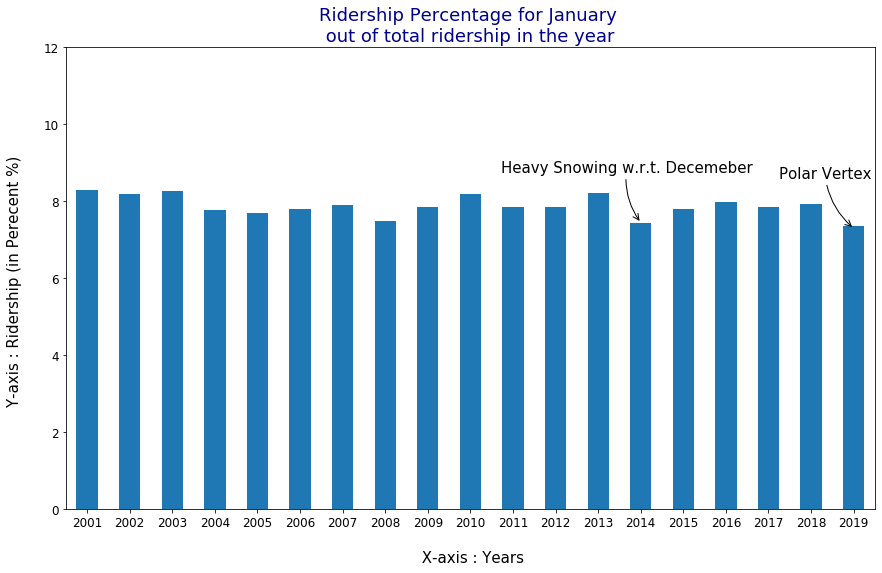

In [4]:
## Insight 2 : Percentage Drop in Riderhsip from December 2018 to January 2019 due to Polar Vertex
bcv.polar_vertex(monthly)

Correlation between Gas prices and Bus Ridership is  0.09493865538035208


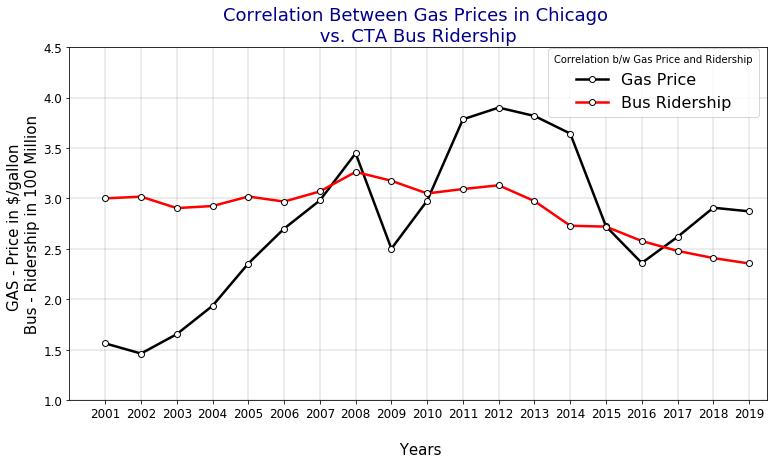

In [5]:
#Insight 3 : Interesting Hypothesis- Is ridership of buses correlated with gas Prices
bh.gasvsbus(gas,monthly)

In [ ]:
# Insight 3 : Most popular bus routes from 2001 to 2019
df = br.bar_race(monthly)

In [7]:
from IPython.display import HTML
HTML("""
<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2187019" data-url="https://flo.uri.sh/visualisation/2187019/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>
""")

In [ ]:
#Baseline Regression average accuracy. Method : Mean
#We have a numbers for Monthly Total Ridership of Each Route of bus from 2001-2019. We divide the dataset into 
#train and test (2001-18 and 2019). Then for the train dataset we take mean for Monthly Total Ridership for each 
#route and predict that to be the Monthly Total ridership for Test set 2019.
# The accuracy for baseline model of mean is -
bb.baseline(monthly)

In [ ]:
# Machine Leaning Model: LSTM
#Clearly we have to use a better machine learning model. We now use Long Short-Term Memory Deep Learning model
#First we differentiate the Month Total Entries in order to get a stable graph and then add 18 lags
#Then we apply 100 epochs to gain more accuracy and better training.
month_sum, df_result = bam.all_monthly_ml(monthly)

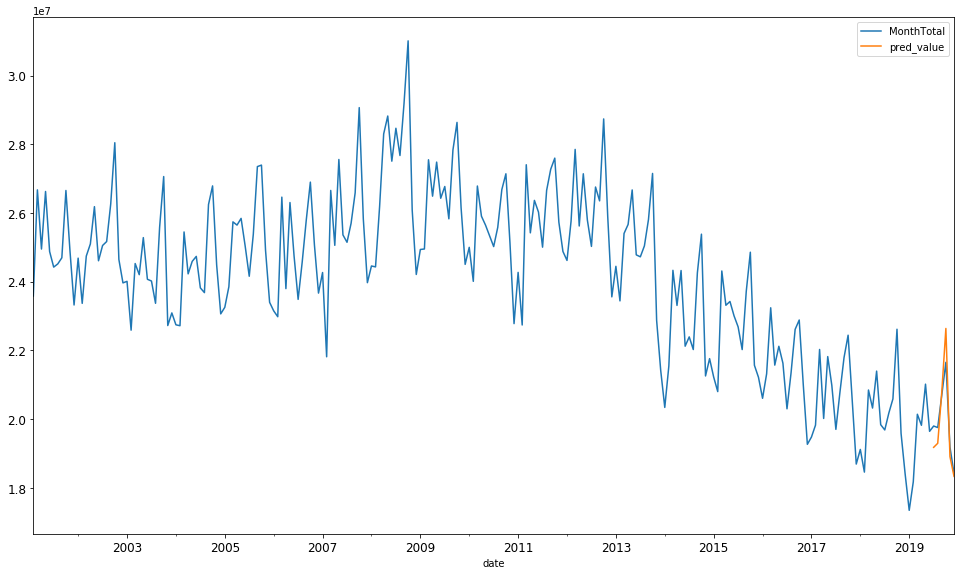

In [10]:
#First we test the model on Total Ridership of CTA Buses. The graph seems pretty accurate.
bam.graph_all_bus(month_sum , df_result)

In [4]:
#Let's Run over main goal. Predicting the value of Ridership for each route each month and then classifying the
#prediction in 5 classes - Heavy Increase, Slight Increase, Almost Same, Slight Decrease and Heavy Decrease
# We also keep thershold for routes with Regression coefficient to be at .65 and accuracy to be > 85
# We save the final result in a csv
final = bnm.route_prediction(monthly)

/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.2361
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4620
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4155
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4011
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3924
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3861
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3812
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3771
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3735
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3704
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3674
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3647
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0422
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0409


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 9ms/step - loss: 0.3503
Epoch 2/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3746
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3695
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3652
Epoch 5/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3622
Epoch 6/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 7/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3585
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3573
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3564
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3556
Epoch 11/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3549
Epoch 12/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3542
Epoch 13/100


203/203 [==============================] - 1s 3ms/step - loss: 0.0326
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0315


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 9ms/step - loss: 0.3157
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3660
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3714
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3700
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3680
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3662
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3645
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3630
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3617
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3606
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3597
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3590
Epoch 13/100


203/203 [==============================] - 1s 4ms/step - loss: 0.0501
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0474


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 10ms/step - loss: 0.3324
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3817
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3767
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3694
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3633
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3583
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3539
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3498
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3456
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3411
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3360
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3301
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0427
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0421


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.2975
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3334
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3133
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2792
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2350
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1804
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1418
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1308
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1236
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1170
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1109
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1054
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0101
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0097


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
179/179 [==============================] - 2s 11ms/step - loss: 0.4115
Epoch 2/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3821
Epoch 3/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3651
Epoch 4/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3576
Epoch 5/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3527
Epoch 6/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3489
Epoch 7/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3460
Epoch 8/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3434
Epoch 9/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3413
Epoch 10/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3394
Epoch 11/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3377
Epoch 12/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3362
Epoch 13/100

179/179 [==============================] - 1s 3ms/step - loss: 0.1075
Epoch 100/100
179/179 [==============================] - 1s 3ms/step - loss: 0.2363


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 10ms/step - loss: 0.3276
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3505
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3475
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3386
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3267
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3111
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2910
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2662
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2416
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2259
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2107
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1934
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0091
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0089


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.2943
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3474
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3219
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2896
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2504
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2110
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1839
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1663
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1536
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1436
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1354
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1284
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0189
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0184


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.2892
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3805
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3629
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3524
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3449
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3388
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3334
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3285
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3237
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3191
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3147
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3103
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0184
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0178


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.3360
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3535
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3521
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3438
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3326
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3183
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2995
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2728
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2321
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1778
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1350
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1175
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0068


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.3226
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3743
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3750
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3705
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3668
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3639
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3616
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3598
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3582
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3568
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3554
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3541
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0273
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0261


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 13ms/step - loss: 0.3414
Epoch 2/100
203/203 [==============================] - ETA: 0s - loss: 0.345 - 1s 4ms/step - loss: 0.3636
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3552
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3479
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3387
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3255
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3011
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2378
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1815
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2000
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1302
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - l

203/203 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0069


/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
7/7 [==============================] - 1s 209ms/step - loss: 0.1985
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2044
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1958
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1856
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1758
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1664
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1573
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1486
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1322
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1245
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1170
Epoch 13/100
7/7 [==============================] - 0s 3ms/

/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 10ms/step - loss: 0.2068
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4325
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3761
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3638
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3578
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3538
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3507
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3481
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3456
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3430
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3402
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3372
Epoch 13/100

203/203 [==============================] - 1s 2ms/step - loss: 0.0610
Epoch 100/100
203/203 [==============================] - 1s 2ms/step - loss: 0.0591


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 10ms/step - loss: 0.3518
Epoch 2/100
203/203 [==============================] - 0s 2ms/step - loss: 0.3610
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3624
Epoch 4/100
203/203 [==============================] - 1s 2ms/step - loss: 0.3615
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3601
Epoch 6/100
203/203 [==============================] - 1s 2ms/step - loss: 0.3586
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3572
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3558
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3546
Epoch 10/100
203/203 [==============================] - 1s 2ms/step - loss: 0.3533
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3520
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3505
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0337
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0324


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 10ms/step - loss: 0.3150
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3825
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3846
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3789
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3737
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3695
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3662
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3634
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3611
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3590
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3572
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3555
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0264
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0258


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 10ms/step - loss: 0.2973
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3832
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3720
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3648
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3604
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3573
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3550
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3532
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3516
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3501
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3487
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3472
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0566
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0546


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 15ms/step - loss: 0.3370
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3672
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3678
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3637
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3596
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3559
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3525
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3491
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3455
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3414
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3363
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3296
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0062


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 11ms/step - loss: 0.3336
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3549
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3555
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3502
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3433
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3350
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3247
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3114
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2939
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2715
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2484
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2332
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0151
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0148


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 12ms/step - loss: 0.3398
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3945
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3842
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3774
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3730
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3698
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3673
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3653
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3636
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3621
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3607
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3594
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0481
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0468


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 16ms/step - loss: 0.3286
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3704
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3698
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3654
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3614
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3580
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3549
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3520
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3490
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3458
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3423
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3382
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0130
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0132


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 13ms/step - loss: 0.3414
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3845
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3685
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3560
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3457
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3360
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3257
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3139
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2998
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2830
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2633
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2415
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0077
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0073


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 13ms/step - loss: 0.3285
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3847
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3768
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3693
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3639
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3600
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3569
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3542
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3518
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3496
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3473
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3450
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0205
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0202


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 15ms/step - loss: 0.3241
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3734
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3750
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3702
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3656
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3620
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3590
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3564
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3542
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3521
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3502
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3483
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0212
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0207


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 12ms/step - loss: 0.3328
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3808
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3772
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3703
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3652
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3614
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3585
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3561
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3540
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3520
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3500
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3479
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0250
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0241


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 12ms/step - loss: 0.3283
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3844
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3749
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3663
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3601
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3550
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3504
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3460
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3412
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3360
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3299
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3226
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0107
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0107


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 2s 12ms/step - loss: 0.2660
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4132
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3818
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3705
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3639
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3593
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3556
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3523
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3492
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3462
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3429
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3394
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0166
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0164


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 14ms/step - loss: 0.3700
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3932
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3798
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3689
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3598
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3512
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3420
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3307
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3151
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2897
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2370
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1467
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0065


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 12ms/step - loss: 0.3332
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3935
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3782
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3764
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3730
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3698
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3673
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3653
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3636
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3621
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3609
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3599
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0319
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0309


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 13ms/step - loss: 0.3345
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3702
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3624
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3538
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3449
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3338
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3174
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2911
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2532
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.2166
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1892
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1633
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0065
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0065


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 13ms/step - loss: 0.3488
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3768
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3738
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3680
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3630
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3586
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3548
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3511
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3473
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3432
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3385
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3327
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0168
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0165


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 13ms/step - loss: 0.3279
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3734
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3747
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3706
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3669
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3639
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3615
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3595
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3578
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3563
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3549
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3536
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0498
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0485


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 14ms/step - loss: 0.3161
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3689
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3700
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3655
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3615
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3583
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3556
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3533
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3512
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3492
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3474
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3455
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0210
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0206


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.3263
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3354
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3331
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3273
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3216
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3169
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3128
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3086
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3044
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3002
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2962
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2922
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0325
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0311


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2875
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4144
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3748
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3604
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3509
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3433
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3363
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3291
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3215
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3133
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3048
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2965
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0357
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0347


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 14ms/step - loss: 0.2204
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4517
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.4071
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3929
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3845
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3788
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3747
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3714
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3689
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3668
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3651
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3636
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.1065
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.1049


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 14ms/step - loss: 0.3410
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3511
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3545
Epoch 4/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3556
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3558
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3557
Epoch 7/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3555
Epoch 8/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3552
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3548
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3545
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3542
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3539
Epoch 13/100

203/203 [==============================] - 1s 3ms/step - loss: 0.0341
Epoch 100/100
203/203 [==============================] - 1s 3ms/step - loss: 0.0336


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 17ms/step - loss: 0.3159
Epoch 2/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3899
Epoch 3/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3852
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3780
Epoch 5/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3731
Epoch 6/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3698
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3672
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3650
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3629
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3610
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3593
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3578
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0879
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0620


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3412
Epoch 2/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3584
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3615
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3605
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3589
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3573
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3559
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3548
Epoch 9/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3538
Epoch 10/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3528
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3519
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3511
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0361
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0352


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 17ms/step - loss: 0.2991
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4005
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3857
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3737
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3654
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3591
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3540
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3496
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3457
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3420
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3384
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3348
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0281
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0272


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 16ms/step - loss: 0.3371
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3703
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3696
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3662
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3633
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3610
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3593
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3580
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3569
Epoch 10/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3560
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3552
Epoch 12/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3545
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0564
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0502


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 5s 22ms/step - loss: 0.3269
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3744
Epoch 3/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3749
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3686
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3631
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3586
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3547
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3511
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3475
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3436
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3394
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3343
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0213
Epoch 100/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0211


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 19ms/step - loss: 0.3349
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3766
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3725
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3669
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3626
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3593
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3566
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3543
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3520
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3498
Epoch 11/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3474
Epoch 12/100
203/203 [==============================] - 1s 3ms/step - loss: 0.3448
Epoch 13/100

203/203 [==============================] - 1s 6ms/step - loss: 0.0148
Epoch 100/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0144


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 22ms/step - loss: 0.3258
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3566
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3595
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3556
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3508
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3462
Epoch 7/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3420
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3379
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3338
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3295
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3250
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3201
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0146
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0143


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 19ms/step - loss: 0.3065
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3993
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3840
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3752
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3695
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3652
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3617
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3587
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3559
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3532
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3504
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3475
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0243
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0235


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 3s 17ms/step - loss: 0.3023
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3390
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3389
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3309
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3212
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3104
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2977
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2828
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2654
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2461
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2274
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2128
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0144
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0136


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3343
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3583
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3607
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3596
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3582
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3570
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3560
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3552
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3545
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3540
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3534
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3530
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.2184
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2234


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 18ms/step - loss: 0.3257
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3428
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3477
Epoch 4/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3475
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3460
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3438
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3411
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3379
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3337
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3280
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3200
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3076
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0110
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0108


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 19ms/step - loss: 0.2563
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4234
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3819
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3675
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3568
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3465
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3353
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3217
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3042
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2805
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2481
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2089
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0422
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0417


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 19ms/step - loss: 0.3235
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3489
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3390
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3221
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3012
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2759
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2501
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2326
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2204
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2077
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1959
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1852
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0187
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0180


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 19ms/step - loss: 0.3135
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3693
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3645
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3550
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3475
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3410
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3344
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3269
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3178
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3060
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2894
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2643
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0120
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0117


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3409
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3486
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3497
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3495
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3488
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3480
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3468
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3451
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3428
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3394
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3343
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3267
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0094
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0092


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 19ms/step - loss: 0.2994
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3717
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3704
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3650
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3607
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3574
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3547
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3524
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3503
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3483
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3464
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3444
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0359
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0350


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 5s 25ms/step - loss: 0.2945
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3590
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3635
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3611
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3587
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3569
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3554
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3543
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3534
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3526
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3520
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3515
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.1024
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1007


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.3030
Epoch 2/100
203/203 [==============================] - 1s 6ms/step - loss: 0.4090
Epoch 3/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3722
Epoch 4/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3628
Epoch 5/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3575
Epoch 6/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3537
Epoch 7/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3507
Epoch 8/100
203/203 [==============================] - 1s 7ms/step - loss: 0.3480
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3453
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3423
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3388
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3346
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0292
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0284


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 18ms/step - loss: 0.1856
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4679
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3929
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3755
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3673
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3626
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3597
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3576
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3561
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3548
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3538
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3533
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0740
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0730


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2334
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4466
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3978
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3870
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3807
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3761
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3723
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3691
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3663
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3638
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3615
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3593
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0214
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0207


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.3080
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3751
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3525
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3337
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3174
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3008
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2826
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2622
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2398
Epoch 10/100
203/203 [==============================] - 1s 7ms/step - loss: 0.2170
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1961
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1785
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0273
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0267


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2583
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.4013
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3536
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3172
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2712
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2184
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1903
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1799
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1720
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1653
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1593
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1539
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0313
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0301


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 22ms/step - loss: 0.3298
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3611
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3588
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3527
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3461
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3381
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3271
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3106
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2884
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2720
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2571
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2357
Epoch 13/100

203/203 [==============================] - 1s 4ms/step - loss: 0.0213
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0210


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 20ms/step - loss: 0.2981
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3623
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3677
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3656
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3632
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3613
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3597
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3584
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3574
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3566
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3559
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3553
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0193
Epoch 100/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0190


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 21ms/step - loss: 0.2766
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4167
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3946
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3835
Epoch 5/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3767
Epoch 6/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3721
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3686
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3659
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3636
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3618
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3602
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3588
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0801
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0781


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 5s 23ms/step - loss: 0.2416
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3407
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3373
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3310
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3257
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3210
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3171
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3138
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3109
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3084
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3060
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3038
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.1428
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1413


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 4s 22ms/step - loss: 0.2695
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3597
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2720
Epoch 4/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1863
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1192
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0915
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0831
Epoch 8/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0786
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0752
Epoch 10/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0725
Epoch 11/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0705
Epoch 12/100
203/203 [==============================] - 1s 4ms/step - loss: 0.0693
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0330
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0329


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 5s 24ms/step - loss: 0.2742
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4260
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3970
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3851
Epoch 5/100
203/203 [==============================] - 1s 6ms/step - loss: 0.3781
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3733
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3699
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3672
Epoch 9/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3650
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3633
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3618
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3605
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.1393
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1385


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 5s 22ms/step - loss: 0.3190
Epoch 2/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3284
Epoch 3/100
203/203 [==============================] - 1s 4ms/step - loss: 0.3237
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3102
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2888
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2549
Epoch 7/100
203/203 [==============================] - 1s 4ms/step - loss: 0.2082
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1848
Epoch 9/100
203/203 [==============================] - 1s 4ms/step - loss: 0.1650
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1449
Epoch 11/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1318
Epoch 12/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1254
Epoch 13/100

203/203 [==============================] - 1s 6ms/step - loss: 0.0176
Epoch 100/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0174


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
65/65 [==============================] - 5s 72ms/step - loss: 0.3719
Epoch 2/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3483
Epoch 3/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3404
Epoch 4/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3331
Epoch 5/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3259
Epoch 6/100
65/65 [==============================] - 0s 7ms/step - loss: 0.3182
Epoch 7/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3097
Epoch 8/100
65/65 [==============================] - 0s 6ms/step - loss: 0.3001
Epoch 9/100
65/65 [==============================] - 0s 6ms/step - loss: 0.2888
Epoch 10/100
65/65 [==============================] - 0s 6ms/step - loss: 0.2751
Epoch 11/100
65/65 [==============================] - 0s 7ms/step - loss: 0.2582
Epoch 12/100
65/65 [==============================] - 0s 6ms/step - loss: 0.2367
Epoch 13/100
65/65 [================

/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
203/203 [==============================] - 5s 27ms/step - loss: 0.2956
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4227
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3808
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3603
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3446
Epoch 6/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3297
Epoch 7/100
203/203 [==============================] - 1s 5ms/step - loss: 0.3139
Epoch 8/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2964
Epoch 9/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2773
Epoch 10/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2576
Epoch 11/100
203/203 [==============================] - 1s 6ms/step - loss: 0.2382
Epoch 12/100
203/203 [==============================] - 1s 7ms/step - loss: 0.2197
Epoch 13/100

203/203 [==============================] - 1s 5ms/step - loss: 0.0114
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0112


/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
5/5 [==============================] - 4s 828ms/step - loss: 0.3430
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3717
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3696
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3595
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3468
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3338
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3211
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3090
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2975
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2866
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2761
Epoch 12/100
5/5 [==============================] - 0s 7ms/step - loss: 0.2662
Epoch 13/100
5/5 [==============================] - 0s 8ms/

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
5/5 [==============================] - 4s 870ms/step - loss: 0.3391
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3427
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3400
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.3318
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3219
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3118
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.3017
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2918
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2821
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.2727
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2635
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2544
Epoch 13/100
5/5 [==============================] - 0s 7ms/

/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/vipul/anaconda3/envs/cs418env/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
5/5 [==============================] - 4s 832ms/step - loss: 0.4849
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4808
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4673
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4571
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4483
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4400
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4319
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4240
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4161
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4083
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4005
Epoch 12/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3929
Epoch 13/100
5/5 [==============================] - 0s 6ms/

/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
189/189 [==============================] - 5s 27ms/step - loss: 0.3386
Epoch 2/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3714
Epoch 3/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3664
Epoch 4/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3614
Epoch 5/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3578
Epoch 6/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3551
Epoch 7/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3531
Epoch 8/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3514
Epoch 9/100
189/189 [==============================] - 1s 7ms/step - loss: 0.3499
Epoch 10/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3486
Epoch 11/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3473
Epoch 12/100
189/189 [==============================] - 1s 5ms/step - loss: 0.3460
Epoch 13/100

189/189 [==============================] - 1s 5ms/step - loss: 0.0184
Epoch 100/100
189/189 [==============================] - 1s 5ms/step - loss: 0.0183


/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=1, shuffle=False)


Epoch 1/100
89/89 [==============================] - 4s 49ms/step - loss: 0.3732
Epoch 2/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3504
Epoch 3/100
89/89 [==============================] - 1s 6ms/step - loss: 0.3446
Epoch 4/100
89/89 [==============================] - 1s 6ms/step - loss: 0.3399
Epoch 5/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3355
Epoch 6/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3310
Epoch 7/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3261
Epoch 8/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3206
Epoch 9/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3142
Epoch 10/100
89/89 [==============================] - 0s 5ms/step - loss: 0.3067
Epoch 11/100
89/89 [==============================] - 0s 5ms/step - loss: 0.2977
Epoch 12/100
89/89 [==============================] - 0s 5ms/step - loss: 0.2864
Epoch 13/100
89/89 [================

/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['class'][l] = "Almost Same"
/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['class'][l] = "Slight Decrease"
/home/vipul/Desktop/IDS/project/bus_nuke_ml.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['class'][l] = "Slight Decrease"
/home/vipul/Desktop/IDS/project/bus_nu

In [5]:
display(final)

,Month,route,Predicted_Ridership_2019,Ridership_2018,Classification,Accuracy_of_Prediction
0,July,3,440332,438230,Almost Same,98.023761
1,August,3,426639,425307,Almost Same,98.590945
2,September,3,437412,448073,Almost Same,97.997463
3,Ocotber,3,461374,490167,Almost Same,98.194521
4,November,3,406057,418467,Almost Same,97.216856
...,...,...,...,...,...,...
235,August,204,28801,26747,Almost Same,94.591184
236,September,204,29260,29765,Almost Same,94.494294
237,Ocotber,204,28039,31949,Slight Decrease,94.084359
238,November,204,27932,32453,Slight Decrease,93.809379
